<a href="https://colab.research.google.com/github/Hira63S/DS-Unit-2-Sprint-2-Regression/blob/master/Hira_Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 20-80 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [0]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm


In [122]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


I want X to be sqft_lot because I think that makes the most difference when it comes to pricing of the houses so:


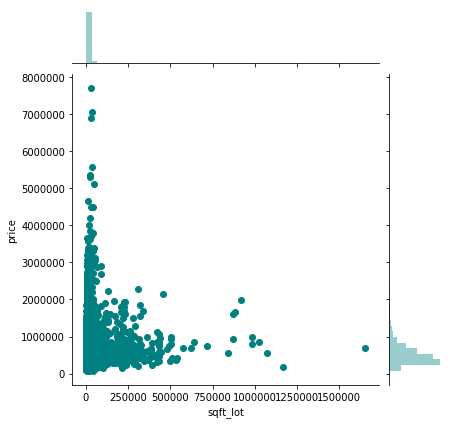

In [123]:
##### Your Code Here #####
sns.jointplot("sqft_lot", "price", data=df, color = 'teal')


In [124]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.

Splitting dataset:

In [125]:
feature = 'sqft_lot'
target = 'price'

X = df[[feature]]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, test_size = 0.20, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((17290, 1), (4323, 1), (17290,), (4323,))

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, test_size = 0.20, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((17290, 1), (4323, 1), (17290,), (4323,))

In [0]:
X_train

In [127]:
model = LinearRegression()
model.fit(X_train,y_train)
model.predict(X_test)




array([532764.11757768, 530931.47317481, 534458.6570163 , ...,
       528957.33472882, 533793.55028665, 534950.07345351])

In [128]:
model.coef_, model.intercept_

(array([0.84726972]), 525229.3479638515)

In [129]:
model.predict([[10000]])

array([533702.04515696])

In [130]:
model.predict([[60000]])

array([576065.5311225])

In [131]:
model.predict(X)

array([530016.42187796, 531365.2752711 , 533702.04515696, ...,
       526373.16208492, 527252.62805357, 526141.01018183])

In [0]:
df['predicted_prices'] = model.predict(X)

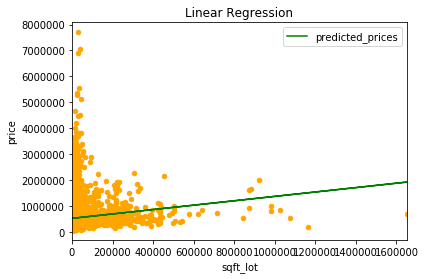

In [135]:
ax = df.plot(x = feature, y = target, kind = 'scatter', title = 'Linear Regression', color = 'orange')
df.plot(x = feature, y = 'predicted_prices' , kind = 'line', ax = ax, color = 'green');


In [136]:
target = 'price'
df['predicted_price'] = df[target].mean()
df['error'] = df['predicted_price'] - df[target]

df['Absolute error'] = df['error'].abs()
mean_absolute_error(y_true = df[target], y_pred = df['predicted_price'])

233941.72427250765

In [137]:
r2_score(y_true = df[target], y_pred = df['predicted_price'])

0.0

In [138]:
print("Mean^2 Error:", mean_squared_error(y_true = y, y_pred = model.predict(X)))



Mean^2 Error: 133701648232.16634


In [139]:
model.score(X,y)

0.007972434702930187

In [140]:
print('Percentage of y accounted for by X:', r2_score(y, model.predict(X)))

Percentage of y accounted for by X: 0.007972434702930187


Ha! Higher percentage shows that it fits the data most closely. So that explains that my model doesn't fit the data closely at all. ugh 

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 80-20 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [0]:
##### Your Code Here #####

from sklearn.model_selection import train_test_split

feature = (df['sqft_lot'], df['bedrooms'])
target = 'price'

X2 = df[['sqft_lot', 'bedrooms']]
y2 = df[target]

In [91]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, train_size = 0.80, test_size = 0.20, random_state = 42)
X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape



((17290, 24), (4323, 24), (17290,), (4323,))

In [92]:
model2 = LinearRegression()
model2.fit(X2, y2)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [99]:
model2.coef_, model2.intercept_


(array([7.08767894e-01, 1.20715409e+05]), 122468.28190398839)

HA! Gotcha!

In [104]:
model2.predict([[2000, 3]])

array([486032.04564905])

So this is if the area is 2000sqft and there are 3 bedrooms. let's see if price drastically changes when the sqft value goes up by 100 or bedroom number goes up by 1.     

In [105]:
model2.predict([[2100, 4]])

array([606818.33175771])

In [108]:
model2.predict([[2100, 5]])

array([727533.74107702])

In [109]:
model2.predict([[3000, 4]])

array([607456.22286192])

This does show that price changes drastically if there is one more bedroom. but changes minorly if we add 1000 sqft to the lot. interesting. I would just build my own bedrooms :-P

In [0]:
df[['sqft_lot', 'bedrooms']]

In [0]:
df['predicted_prices_2'] = model2.predict(df[['sqft_lot', 'bedrooms']])

In [152]:
df['predicted_prices2'] = model2.predict(X2)

ValueError: ignored

In [0]:
ax = df.plot(x = feature, y = target, kind = 'scatter', title = 'Linear Regression # 2', color = 'teal')
df.plot(x = feature, y = 'predicted_prices_2' , kind = 'line', ax = ax, color = 'navy');


In [0]:
ax = df.plot(x = feature, y = target, kind = 'scatter', title = 'Linear Regression # 2')
df.plot(x = feature, y = 'predicted_prices' , kind = 'line', ax = ax);


# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [0]:
##### Your Code Here #####

X3 = df.drop(columns = 'price')
y3 = df['price']



In [0]:
model3 = LinearRegression()

# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- AMES Housing Prediction Kaggle Competition: <https://www.kaggle.com/c/house-prices-advanced-regression-techniques>
- **WRITE A BLOG POST** explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
